In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Unpack lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 
lat_lngs = zip(lats, lngs)
lat_lngs

# One can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure to unzip the latitudes and longitudes into the coordinates list before moving on.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print (coordinates)

[(73.02303495523239, -95.93700907221007), (-58.38836941571977, 175.36169249929935), (10.871744525553765, -137.3032927053435), (-17.984722617777905, 59.3080020565051), (-55.32370500068907, 140.99870796589363), (19.367689895091317, 43.347049763368034), (2.2444217667756163, 14.119457354318143), (-40.94327619683435, 101.22921473838312), (-67.01034793713137, -146.21368456754217), (-4.738167800269011, -116.02778877234536), (-82.62438523176486, 28.375466614467342), (51.298970523838875, -15.038000741001298), (-63.4605837650136, -36.716674956006045), (48.84955505449989, 87.14865134417283), (84.05817389393437, -55.5501561859282), (7.144414422238469, -149.88723097193332), (73.19084389660895, -66.79700500303778), (-14.004090142826257, 140.45095756569833), (34.36213008172062, 28.49082509956432), (41.915544314104324, 107.54011018688732), (80.50067786309373, 100.53760076154839), (-15.350578181355758, -156.45929936164097), (-57.62407936097026, -25.208290166835326), (-74.34585673035907, 52.362188155672

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [5]:
# Build the basic URL for the OpenWeatherMap with my weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count =+ 1
    

Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing Record 1 of Set 1 | saint-georges
Processing

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | thompson
Processing Record 2 of Set 13 | kaitangata
Processing Record 3 of Set 13 | hilo
Processing Record 4 of Set 13 | grand gaube
Processing Record 5 of Set 13 | new norfolk
Processing Record 6 of Set 13 | abha
Processing Record 7 of Set 13 | sembe
Processing Record 8 of Set 13 | busselton
Processing Record 9 of Set 13 | mataura
Processing Record 10 of Set 13 | atuona
Processing Record 11 of Set 13 | kruisfontein
Processing Record 12 of Set 13 | dingle
Processing Record 13 of Set 13 | ushuaia
Processing Record 14 of Set 13 | altay
Processing Record 15 of Set 13 | upernavik
Processing Record 16 of Set 13 | clyde river
Processing Record 17 of Set 13 | alyangula
Processing Record 18 of Set 13 | karpathos
Processing Record 19 of Set 13 | haibowan
City not found. Skipping...
Processing Record 20 of Set 13 | khatanga
Processing Record 21 of Set 13 | faanui
Processing Record 22 of Set 13 | chuy
Processing Record 23 of Set 13 | east london
Processing Record 2

Processing Record 35 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 36 of Set 16 | hovd
Processing Record 37 of Set 16 | belozerskoye
Processing Record 38 of Set 16 | atar
Processing Record 39 of Set 16 | abay
Processing Record 40 of Set 16 | blucina
Processing Record 41 of Set 16 | mount gambier
Processing Record 42 of Set 16 | lompoc
Processing Record 43 of Set 16 | carnarvon
Processing Record 44 of Set 16 | san juan ixcoy
Processing Record 45 of Set 16 | port elizabeth
Processing Record 46 of Set 16 | saint george
Processing Record 47 of Set 16 | port macquarie
Processing Record 48 of Set 16 | saint anthony
Processing Record 49 of Set 16 | puerto del rosario
Processing Record 50 of Set 16 | ostrovnoy
Processing Record 1 of Set 17 | northallerton
Processing Record 2 of Set 17 | chubbuck
Processing Record 3 of Set 17 | guajara-mirim
City not found. Skipping...
Processing Record 4 of Set 17 | chihuahua
Processing Record 5 of Set 17 | khonuu
City not found. Skipp

Processing Record 17 of Set 20 | lengshuijiang
Processing Record 18 of Set 20 | manaure
Processing Record 19 of Set 20 | amahai
Processing Record 20 of Set 20 | ustye
Processing Record 21 of Set 20 | chagda
City not found. Skipping...
Processing Record 22 of Set 20 | sorland
Processing Record 23 of Set 20 | amderma
City not found. Skipping...
Processing Record 24 of Set 20 | hamilton
Processing Record 25 of Set 20 | stony plain
Processing Record 26 of Set 20 | puerto quijarro
Processing Record 27 of Set 20 | rio grande
Processing Record 28 of Set 20 | zhongshu
Processing Record 29 of Set 20 | meulaboh
Processing Record 30 of Set 20 | calabozo
Processing Record 31 of Set 20 | bethel
Processing Record 32 of Set 20 | touros
Processing Record 33 of Set 20 | bonthe
Processing Record 34 of Set 20 | antalaha
Processing Record 35 of Set 20 | marawi
Processing Record 36 of Set 20 | port hardy
Processing Record 37 of Set 20 | hemnesberget
Processing Record 38 of Set 20 | ketchikan
Processing Rec

Processing Record 1 of Set 24 | galesburg
Processing Record 2 of Set 24 | roma
Processing Record 3 of Set 24 | japura
Processing Record 4 of Set 24 | nanortalik
Processing Record 5 of Set 24 | ecoporanga
Processing Record 6 of Set 24 | sayyan
Processing Record 7 of Set 24 | margate
Processing Record 8 of Set 24 | coquimbo
Processing Record 9 of Set 24 | shaoguan
Processing Record 10 of Set 24 | panagar
Processing Record 11 of Set 24 | mogadishu
Processing Record 12 of Set 24 | sedelnikovo
City not found. Skipping...
Processing Record 13 of Set 24 | caucaia
Processing Record 14 of Set 24 | mombaca
Processing Record 15 of Set 24 | san patricio
Processing Record 16 of Set 24 | kavaratti
Processing Record 17 of Set 24 | yenagoa
Processing Record 18 of Set 24 | nguiu
City not found. Skipping...
Processing Record 19 of Set 24 | tual
Processing Record 20 of Set 24 | clovis
Processing Record 21 of Set 24 | siocon
Processing Record 22 of Set 24 | ituni
City not found. Skipping...
Processing Rec

In [9]:
# Tally the number of cities in the city_data array of dictionaries
len(city_data)

584

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,62.67,53,100,5.73,CA,2022-05-26 17:00:12
1,Kaitangata,-46.2817,169.8464,37.85,91,5,4.65,NZ,2022-05-26 17:04:42
2,Hilo,19.7297,-155.0900,82.27,84,0,6.91,US,2022-05-26 17:03:34
3,Grand Gaube,-20.0064,57.6608,72.00,77,7,3.00,MU,2022-05-26 17:04:43
4,New Norfolk,-42.7826,147.0587,52.92,81,66,3.00,AU,2022-05-26 17:04:43
5,Abha,18.2164,42.5053,71.85,56,3,6.91,SA,2022-05-26 17:04:44
6,Sembe,1.6481,14.5806,72.30,96,87,3.06,CG,2022-05-26 17:04:44
7,Busselton,-33.6500,115.3333,54.82,73,0,7.76,AU,2022-05-26 17:04:44
8,Mataura,-46.1927,168.8643,33.48,97,3,1.59,NZ,2022-05-26 17:04:45
9,Atuona,-9.8000,-139.0333,77.94,76,12,17.43,PF,2022-05-26 17:04:45


In [11]:
# Reorder the Columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-05-26 17:00:12,55.7435,-97.8558,62.67,53,100,5.73
1,Kaitangata,NZ,2022-05-26 17:04:42,-46.2817,169.8464,37.85,91,5,4.65
2,Hilo,US,2022-05-26 17:03:34,19.7297,-155.0900,82.27,84,0,6.91
3,Grand Gaube,MU,2022-05-26 17:04:43,-20.0064,57.6608,72.00,77,7,3.00
4,New Norfolk,AU,2022-05-26 17:04:43,-42.7826,147.0587,52.92,81,66,3.00
5,Abha,SA,2022-05-26 17:04:44,18.2164,42.5053,71.85,56,3,6.91
6,Sembe,CG,2022-05-26 17:04:44,1.6481,14.5806,72.30,96,87,3.06
7,Busselton,AU,2022-05-26 17:04:44,-33.6500,115.3333,54.82,73,0,7.76
8,Mataura,NZ,2022-05-26 17:04:45,-46.1927,168.8643,33.48,97,3,1.59
9,Atuona,PF,2022-05-26 17:04:45,-9.8000,-139.0333,77.94,76,12,17.43


In [13]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Weather Data Plot

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1653590727.1144814

In [16]:
# Use string format method to reformat the datetime stamp.
today = time.strftime("%x")
today

'05/26/22'

# Latitude vs. Temperature

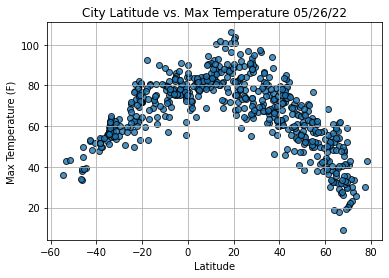

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

# Latitude vs. Humidity

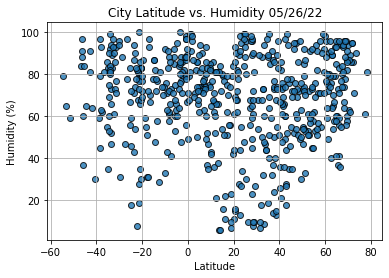

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig2.png")
# Show plot.
plt.show()

# Latitude vs. Cloudiness

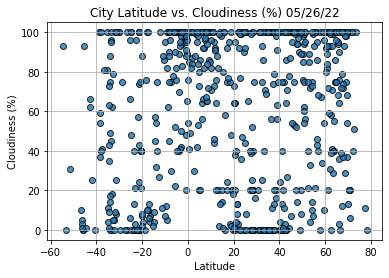

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig3.png")
# Show plot.
plt.show()

# Latitude vs. Wind Speed

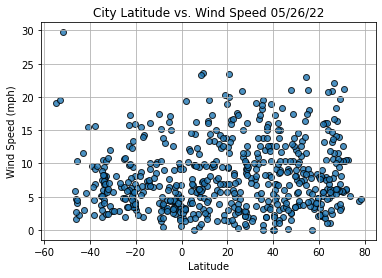

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig4.png")

# Show plot.
plt.show()

# Correlations

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create a new DataFrame from the current DataFrame 
# Use loc method to get a specific row from a current DataFrame 
index13 = city_data_df.loc[13]
index13

City                        Altay
Country                        CN
Date          2022-05-26 17:04:46
Lat                       47.8667
Lng                       88.1167
Max Temp                    65.93
Humidity                       69
Cloudiness                     94
Wind Speed                   2.57
Name: 13, dtype: object

In [24]:
# Filter the DF for all Northern Hemisphere latitudes >= 0
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
579     True
580     True
581    False
582     True
583     True
Name: Lat, Length: 584, dtype: bool

In [25]:
# Create a DF with all data fitting the criteria from above, for latitudes greater than or equal to 0, using the loc method
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-05-26 17:00:12,55.7435,-97.8558,62.67,53,100,5.73
2,Hilo,US,2022-05-26 17:03:34,19.7297,-155.0900,82.27,84,0,6.91
5,Abha,SA,2022-05-26 17:04:44,18.2164,42.5053,71.85,56,3,6.91
6,Sembe,CG,2022-05-26 17:04:44,1.6481,14.5806,72.30,96,87,3.06
11,Dingle,PH,2022-05-26 17:04:46,10.9995,122.6711,77.81,86,100,2.21


# The Hemispheres

In [26]:
# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-05-26 17:00:12,55.7435,-97.8558,62.67,53,100,5.73
2,Hilo,US,2022-05-26 17:03:34,19.7297,-155.0900,82.27,84,0,6.91
5,Abha,SA,2022-05-26 17:04:44,18.2164,42.5053,71.85,56,3,6.91
6,Sembe,CG,2022-05-26 17:04:44,1.6481,14.5806,72.30,96,87,3.06
11,Dingle,PH,2022-05-26 17:04:46,10.9995,122.6711,77.81,86,100,2.21


In [27]:
# Create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kaitangata,NZ,2022-05-26 17:04:42,-46.2817,169.8464,37.85,91,5,4.65
3,Grand Gaube,MU,2022-05-26 17:04:43,-20.0064,57.6608,72.00,77,7,3.00
4,New Norfolk,AU,2022-05-26 17:04:43,-42.7826,147.0587,52.92,81,66,3.00
7,Busselton,AU,2022-05-26 17:04:44,-33.6500,115.3333,54.82,73,0,7.76
8,Mataura,NZ,2022-05-26 17:04:45,-46.1927,168.8643,33.48,97,3,1.59


# Correalation

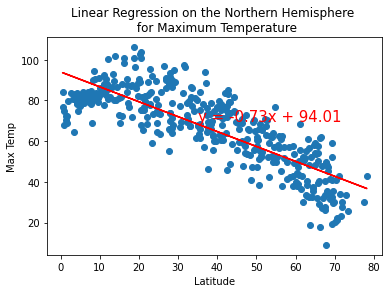

<Figure size 432x288 with 0 Axes>

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(35,70))

# Save the figure.
plt.savefig("Resources/Fig5.png")

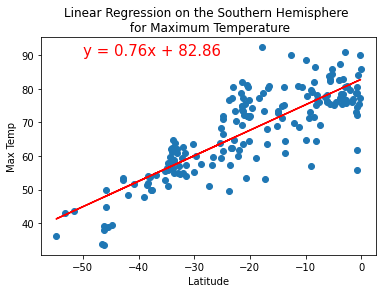

<Figure size 432x288 with 0 Axes>

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Save the figure.
plt.savefig("Resources/Fig6.png")

# Correlation of Latitude & Humidity

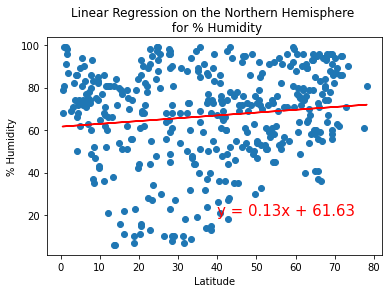

<Figure size 432x288 with 0 Axes>

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

# Save the figure.
plt.savefig("Resources/Fig7.png")

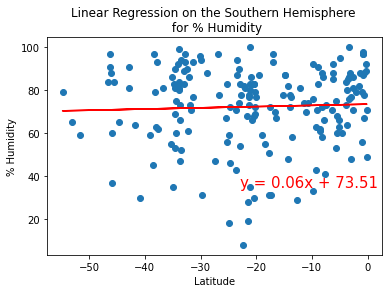

<Figure size 432x288 with 0 Axes>

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-23,35))

# Save the figure.
plt.savefig("Resources/Fig8.png")

# Correlation between Latitude & Cloudiness %

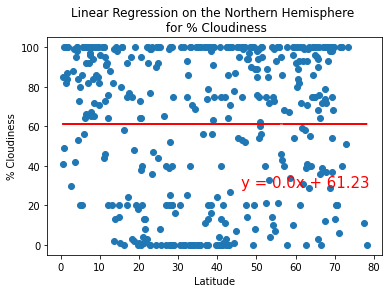

<Figure size 432x288 with 0 Axes>

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(46,29))

# Save the figure.
plt.savefig("Resources/Fig9.png")

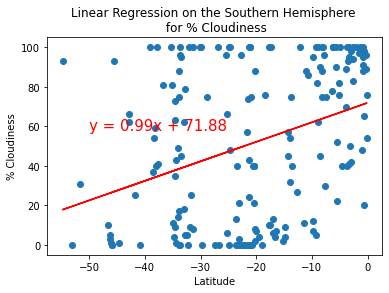

<Figure size 432x288 with 0 Axes>

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,58))

# Save the figure.
plt.savefig("Resources/Fig10.png")

# Correlation of Latitude & Wind Speed

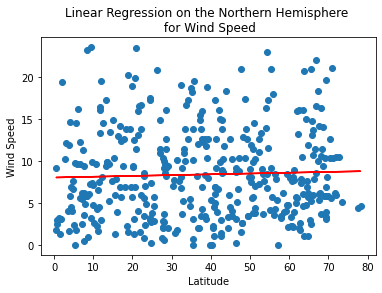

<Figure size 432x288 with 0 Axes>

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,33))

# Save the figure.
plt.savefig("Resources/Fig11.png")

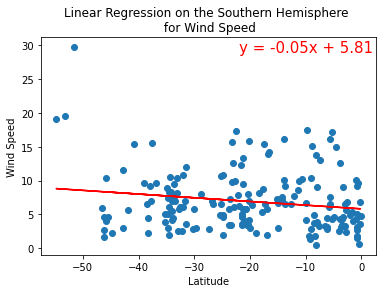

<Figure size 432x288 with 0 Axes>

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-22,29))

# Save the figure.
plt.savefig("Resources/Fig12.png")